In [7]:
!pwd

/Users/saurabh/Desktop/MSCS/CSC522/Project


In [8]:
import pandas as pd
import os

In [9]:
# read movie_titles.csv 
column_names = ['MovieID', 'YearOfRelease', 'Title']
data = pd.read_csv('/Users/saurabh/Downloads/archive 3/movie_titles.csv', encoding="ISO-8859-1", error_bad_lines=False, header=None, names=column_names)

In [10]:
data.head(5)

,MovieID,YearOfRelease,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [11]:
import os
for dirname, _, filenames in os.walk('netflix_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re
import csv
import pandas as pd

netflix_data/user_ratings.csv
netflix_data/combined_data_2.txt
netflix_data/combined_data_3.txt
netflix_data/combined_data_1.txt
netflix_data/combined_data_4.txt


In [12]:
def process_training_data(input_files, output_file):
    #regex patterns to identify MoveId and CustomerData
    '''
    Data in the form of:

    MovieId:
    CutomerId, Rating, Date
    
    '''

    id_pattern = r'^(\d+):\s*$'
    data_pattern = r'^(\d+),\s*([\d.]+),\s*(\d{4}-\d{2}-\d{2})$'

    with open(output_file, 'w', newline='') as out_file:
        out_file.write('CustomerID,Rating,Date,MovieID\n')

        for file_name in input_files:
            processed_data = []
            current_movie_id = None

            print(f"Analyzing {file_name}")

            with open(file_name, 'r') as in_file:
                for line in in_file:
                    line = line.strip()
                    match_id = re.match(id_pattern, line)
                    match_data = re.match(data_pattern, line)

                    if match_id:        
                        current_movie_id = match_id.group(1)
                    elif match_data:
                        customer_id, rating, date = match_data.groups()
                        processed_data.append(f'{customer_id},{rating},{date},{current_movie_id}\n')
                    else:
                        raise Exception('Unexpected format: Missing ID or Data')

            out_file.writelines(processed_data)
            print("CSV file created successfully.")

# Example usage
input_files = ['netflix_data/combined_data_1.txt', 'netflix_data/combined_data_2.txt', 'netflix_data/combined_data_3.txt', 'netflix_data/combined_data_4.txt']
output_file = 'netflix_data/user_ratings.csv'

process_training_data(input_files, output_file)

Analyzing netflix_data/combined_data_1.txt
CSV file created successfully.
Analyzing netflix_data/combined_data_2.txt
CSV file created successfully.
Analyzing netflix_data/combined_data_3.txt
CSV file created successfully.
Analyzing netflix_data/combined_data_4.txt
CSV file created successfully.


In [13]:
data_chunks = []

# Use a loop to read the CSV in chunks
for chunk in pd.read_csv('netflix_data/user_ratings.csv', chunksize=10000):
    data_chunks.append(chunk)

# After processing all chunks, concatenating them into a single DataFrame
final_dataframe = pd.concat(data_chunks, ignore_index=True)

In [ ]:
final_dataframe_model = final_dataframe.sample(frac=0.15)
final_dataframe_model.to_csv('final_data_15.csv')

In [8]:
# Data Size is huge. So, it's very difficult to manage on limited hardware configuration, hence sampling 75% of the data for EDA.

final_data = final_dataframe.sample(frac=0.75)
final_data.head()

,CustomerID,Rating,Date,MovieID
30117927,363090,4,2004-06-17,5515
49325077,1286407,3,2004-05-28,8872
32319491,640031,3,2003-09-25,5875
93671014,1009110,4,2005-05-18,16607
5596960,2329026,4,2004-03-25,1129


In [11]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75360380 entries, 61317704 to 14177166
Data columns (total 4 columns):
CustomerID    int64
Rating        int64
Date          object
MovieID       int64
dtypes: int64(3), object(1)
memory usage: 2.8+ GB


In [12]:
final_data.describe()

,CustomerID,Rating,MovieID
count,7.536038e+07,7.536038e+07,7.536038e+07
mean,1.322492e+06,3.604220e+00,9.070629e+03
std,7.644799e+05,1.085194e+00,5.131884e+03
min,6.000000e+00,1.000000e+00,1.000000e+00
25%,6.614070e+05,3.000000e+00,4.675000e+03
50%,1.319012e+06,4.000000e+00,9.051000e+03
75%,1.984378e+06,4.000000e+00,1.363400e+04
max,2.649429e+06,5.000000e+00,1.777000e+04


In [15]:
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Using cached matplotlib-3.5.3-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/90/54/d173ef7c814476f23471781768804356494363a824e312a1bd0fef50344c/kiwisolver-1.4.5-cp37-cp37m-macosx_10_9_x86_64.whl.metadata
  Using cached Pillow-9.5.0-cp37-cp37m-macosx_10_10_x86_64.whl (3.4 MB)
  Obtaining dependency information for pyparsing>=2.2.1 from https://files.pythonhosted.org/packages/39/92/8486ede85fcc088f1b3dba4ce92dd29d126fd96b0008ea213167940a2475/pyparsing-3.1.1-py3-none-any.whl.metadata
Using cached kiwisolver-1.4.5-cp37-cp37m-macosx_10_9_x86_64.whl (67 kB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

final_dataframe.shape

(100480507, 4)

In [17]:
final_data.shape

(75360380, 4)

In [18]:
final_data.head()

,CustomerID,Rating,Date,MovieID
61317704,2424683,3,2004-08-16,11182
55102674,2451736,4,2005-08-19,10078
95978192,2218837,5,2004-04-04,17003
56804982,2590110,3,2005-10-24,10375
26421162,841190,3,2005-07-09,4914


In [19]:
total_ratings = final_data.shape[0]
unique_users = final_data.CustomerID.nunique()
unique_movies = final_data.MovieID.nunique()

print(f'Total number of rating: {total_ratings}')
print(f'Total number of users: {unique_users}')
print(f'Total number of movies: {unique_movies}')

Total number of rating: 75360380
Total number of users: 479670
Total number of movies: 17770


#### We can see there are 75,360,380 elements in the sparse matrix of size 479646 x 17770. Therefore, only 0.88% of the matrix is filled.

In [20]:
# checking for missing values
final_data.isna().sum()

CustomerID    0
Rating        0
Date          0
MovieID       0
dtype: int64

In [44]:
final_data.duplicated().sum()

0

#### We can conclude that the data has no Missing Values or Duplicate Values.

In [52]:
rating_distribution = final_data.Rating.value_counts(normalize=True).reset_index()
rating_distribution

,index,Rating
0,4,0.335904
1,3,0.286735
2,5,0.230565
3,2,0.100839
4,1,0.045957


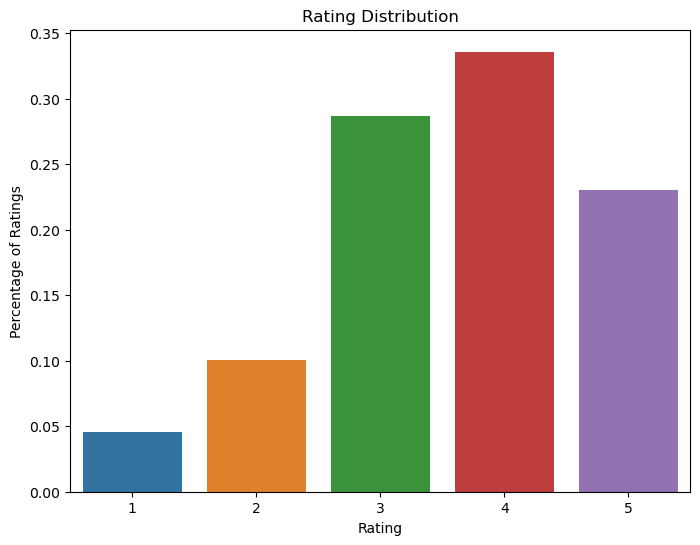

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(rating_distribution, x='index',y='Rating')
plt.title('Rating Distribution')
plt.xlabel('Rating') 
plt.ylabel('Percentage of Ratings')
del rating_distribution
plt.show()

In [58]:
final_data['Rating_year'] = final_data.Date.apply(lambda x: x.split('-')[0])

In [71]:
rating_by_year = final_data.Rating_year.value_counts(normalize=True).reset_index()
rating_by_year

,index,Rating_year
0,2005,0.529936
1,2004,0.300595
2,2003,0.099398
3,2002,0.043233
4,2001,0.017604
5,2000,0.009212
6,1999,0.000022


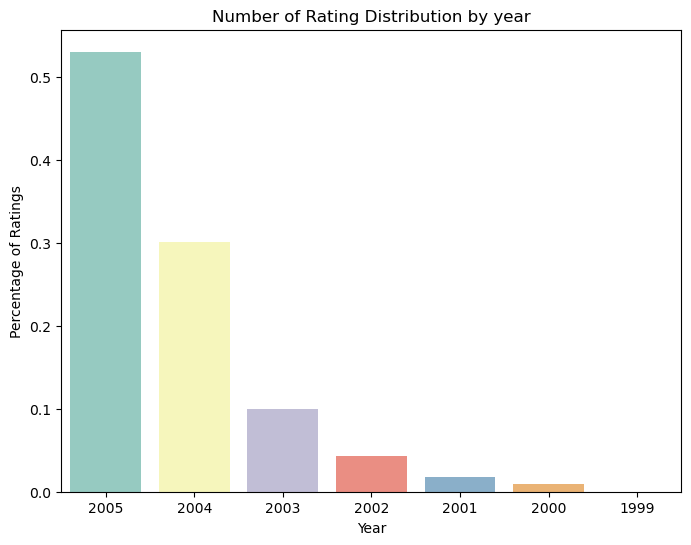

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(rating_by_year, x='index',y='Rating_year')
sns.set_palette("Set2")
plt.title('Number of Rating Distribution by year')
plt.xlabel('Year') 
plt.ylabel('Percentage of Ratings')
del rating_by_year
plt.show()

In [95]:
data.fillna(0, inplace=True)
data['YearOfRelease'] = data['YearOfRelease'].astype(int)
data.head()

,MovieID,YearOfRelease,Title
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [96]:
releases_by_year = data[data.YearOfRelease > 1800].YearOfRelease.value_counts(normalize=True)
releases_by_year

2004    0.081024
2002    0.073679
2003    0.071326
2000    0.069605
2001    0.067022
          ...   
1923    0.000115
1918    0.000115
1914    0.000115
1909    0.000057
1896    0.000057
Name: YearOfRelease, Length: 94, dtype: float64

In [97]:
len(data[data.YearOfRelease > 1900])/len(data)*100

99.95411265343581

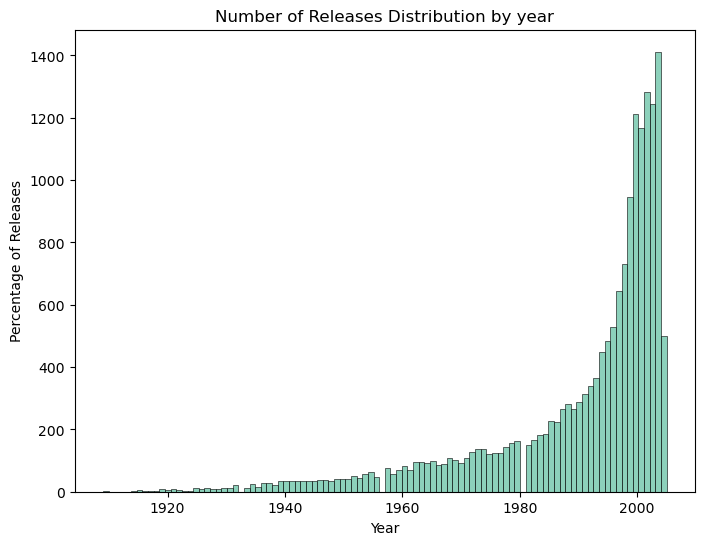

In [98]:
plt.figure(figsize=(8,6))
sns.histplot(data[data.YearOfRelease > 1900].YearOfRelease, bins=100)
plt.title('Number of Releases Distribution by year')
plt.xlabel('Year') 
plt.ylabel('Percentage of Releases')

del data, releases_by_year

plt.show()

In [ ]:
# first rating
final_data = final_data.sort_values(by=['Rating_year'], ascending=True).reset_index(drop=True)
first_rating = final_data.drop_duplicates(subset=['CustomerID'], keep='first')
first_rating.head()

In [ ]:
first_rating_by_year = first_rating.Rating_year.value_counts(normalize=True).reset_index()
first_rating_by_year

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(first_rating_by_year, x='index',y='Rating_year')
plt.title('Number of first ratings distribution by year')
plt.xlabel('Year') 
plt.ylabel('Percentage of first ratings')
del first_rating, first_rating_by_year
plt.show()

In [ ]:
last_rating = final_data.drop_duplicates(subset=['CustomerID'], keep='last')
last_rating.head()

In [10]:
final_data.describe()

,CustomerID,Rating,MovieID
count,7.536038e+07,7.536038e+07,7.536038e+07
mean,1.322501e+06,3.604346e+00,9.071131e+03
std,7.645683e+05,1.085196e+00,5.131751e+03
min,6.000000e+00,1.000000e+00,1.000000e+00
25%,6.611680e+05,3.000000e+00,4.677000e+03
50%,1.319012e+06,4.000000e+00,9.051000e+03
75%,1.984503e+06,4.000000e+00,1.363500e+04
max,2.649429e+06,5.000000e+00,1.777000e+04
